In [ ]:


from google.colab import files
uploaded = files.upload()

Saving reviews_jblearphones.csv to reviews_jblearphones.csv


In [ ]:
import pandas as pd
import numpy as np

reviews = pd.read_csv('reviews_jblearphones.csv',low_memory=False)
reviews.columns = ['review.user_name','review.title','review.rating','review.date','text']
a = np.array([])
for r in reviews["review.rating"]: 
    rate = r[:3]
    a = np.append(a, rate)


print('answer')
print(a)
test_comments = pd.concat([reviews['text']+". "+ reviews['review.title']],axis=1)
test_comments.columns=['text']
tex = np.array([])
for r in test_comments['text']:
  j = r.replace("\n" , "")

  tex = np.append(tex,j)


answer
['4.0' '5.0' '3.0' ... '5.0' '5.0' '3.0']


In [ ]:
test_comments.head()

,text
0,I must say that in INR.650/- I found the best ...
1,"""""""Good Sound Quality""""""Pros:1. Sound quality ..."
2,Previously I owned phillips headset.. Those wh...
3,"After using it for 2-3 months, the headphone i..."
4,Used this product for 7-8 months and it sudden...


In [ ]:
test_comments.shape

(4990, 1)

In [ ]:
data = pd.DataFrame()
for row_index,row in test_comments.iterrows():
    comment=""
    sentiment=0
    for index,value in row.iteritems():
        if(type(value)==str):
            if not value.isdigit():
                comment+=value+" "
            else:
                sentiment = int(value)
                break
    data = data.append({"comment":comment,"sentiment":sentiment},ignore_index=True)
print(data)

                                                comment  sentiment
0     I must say that in INR.650/- I found the best ...        0.0
1     """Good Sound Quality"""Pros:1. Sound quality ...        0.0
2     Previously I owned phillips headset.. Those wh...        0.0
3     After using it for 2-3 months, the headphone i...        0.0
4     Used this product for 7-8 months and it sudden...        0.0
...                                                 ...        ...
4985  Good headphone ..Bass 9/10Treble 10/10Voice qu...        0.0
4986  This product was purchased trusting the JBL br...        0.0
4987  Best in all its price catagory.\n            ....        0.0
4988  Very good sound products\n            . Excell...        0.0
4989  I'd prefer mii earphones to this particular pr...        0.0

[4990 rows x 2 columns]


In [ ]:
test_comments['rating'] = a
test_comments['text'] = tex
tex1 = np.array([])
for r in test_comments['text']:
  j = r.replace('""' , '"')
  tex1 = np.append(tex1,j)
tex_f = np.array([])
test_comments['text'] = tex1
for r in test_comments['text']:
  j = r.replace('  ' , '')
  tex_f = np.append(tex_f,j)
test_comments['text'] = tex_f
test_comments['recommend'] = test_comments.apply(lambda x: "True" if x.rating == "3.0" or x.rating == "4.0" or x.rating == "5.0" else "False",axis=1)
print(test_comments)


                                                   text rating recommend
0     I must say that in INR.650/- I found the best ...    4.0      True
1     ""Good Sound Quality""Pros:1. Sound quality is...    5.0      True
2     Previously I owned phillips headset.. Those wh...    3.0      True
3     After using it for 2-3 months, the headphone i...    1.0     False
4     Used this product for 7-8 months and it sudden...    3.0      True
...                                                 ...    ...       ...
4985  Good headphone ..Bass 9/10Treble 10/10Voice qu...    5.0      True
4986  This product was purchased trusting the JBL br...    2.0     False
4987      Best in all its price catagory.. Best Product    5.0      True
4988                Very good sound products. Excellent    5.0      True
4989  I'd prefer mii earphones to this particular pr...    3.0      True

[4990 rows x 3 columns]


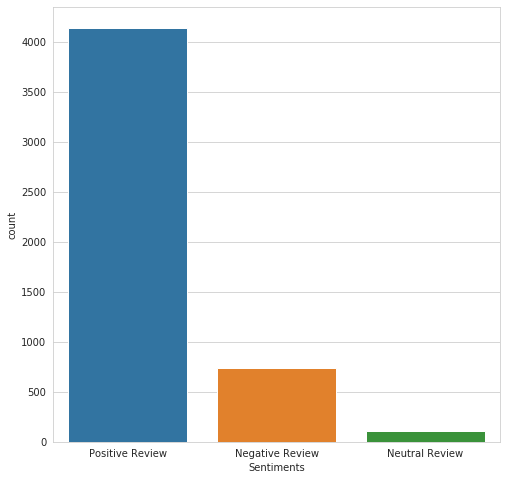

In [ ]:
import seaborn as sns
from textblob import TextBlob
from matplotlib import pyplot as plt
import pandas as pd
from textblob import TextBlob #processing textual data

bloblist_desc = list()
df_review_str = test_comments['text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiments'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(8, 8))

sns.set_style("whitegrid")

ax = sns.countplot(x="Sentiments", data=df_polarity_desc)

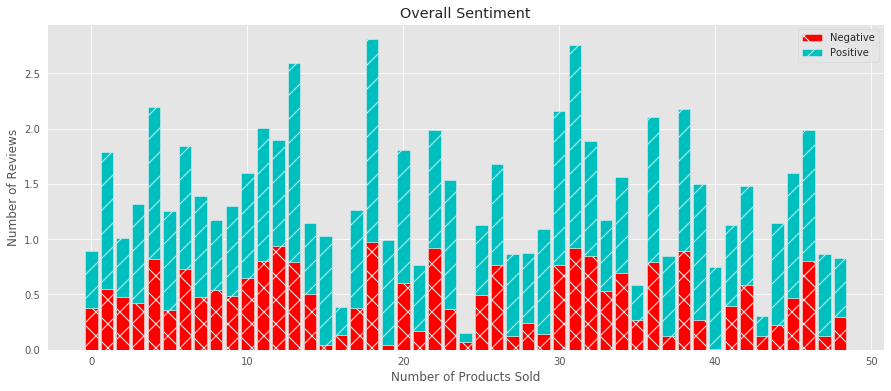

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
plt.figure(figsize=(15,6))
N = 49
x1 = np.random.random(N)
y1= np.random.random(N)

X = np.arange(N)

plt.bar(X, x1, color ='r', hatch ='x', label="Negative")
plt.bar(X, x1+y1, bottom = x1, color ='c', hatch ='/', label="Positive")

plt.xlabel('Number of Products Sold')
plt.ylabel('Number of Reviews')
plt.title('Overall Sentiment')

plt.legend()

In [ ]:
import string
import nltk
from nltk import PorterStemmer
nltk.download('stopwords')
import re 

stopwords = nltk.corpus.stopwords.words('english')
stop = set(stopwords)
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()
def clean_document(doc):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doc_link_clean = re.sub(r'http\S+', '', doc)
    doc_clean_and = re.sub(r'&\S+', '', doc_link_clean)
    doc_clean_at = re.sub(r'@\S+', '', doc_clean_and)
    doc_clean = doc_clean_at.replace('-', ' ')
    doc_alphas = re.sub(r'\W +', ' ', doc_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doc_clean = ' '.join([word.translate(trans_table) for word in doc_alphas.split(' ')])
    doc_clean = doc_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doc_clean = ([p.sub("", x).strip() for x in doc_clean])
    doc_clean = [word.lower() for word in doc_clean if len(word) > 2]
    doc_clean = ([i for i in doc_clean if i not in stop])
#     doc_clean = [spell(word) for word in doc_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doc_clean = ([p.sub("", x).strip() for x in doc_clean])
#     doc_clean = ([spell(k) for k in doc_clean])
    return doc_clean

def clean_stem (sent): 
    tempo_1 ="".join(x for x in sent if x not in string.punctuation)
    tempo_2 = re.split('\W+',tempo_1.lower())
    tempo_3 = [ps.stem(x) for x in tempo_2 if x not in stopwords]
    return tempo_3

def clean_lemma (sent): 
    tempo_1 ="".join(x for x in sent if x not in string.punctuation)
    tempo_2 = re.split('\W+',tempo_1.lower())
    tempo_3 = [wn.lemmatize(x) for x in tempo_2 if x not in stopwords]
    return tempo_3


review_cleans = [clean_document(doc) for doc in test_comments['text']]
sentences = [' '.join(r) for r in review_cleans ]

print(test_comments)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                   text rating recommend
0     I must say that in INR.650/- I found the best ...    4.0      True
1     ""Good Sound Quality""Pros:1. Sound quality is...    5.0      True
2     Previously I owned phillips headset.. Those wh...    3.0      True
3     After using it for 2-3 months, the headphone i...    1.0     False
4     Used this product for 7-8 months and it sudden...    3.0      True
...                                                 ...    ...       ...
4985  Good headphone ..Bass 9/10Treble 10/10Voice qu...    5.0      True
4986  This product was purchased trusting the JBL br...    2.0     False
4987      Best in all its price catagory.. Best Product    5.0      True
4988                Very good sound products. Excellent    5.0      True
4989  I'd prefer mii earphones to this particular pr...    3.0      True

[499

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(test_comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(test_comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Stemmed - 8599
Lemmatized - 9728


In [ ]:
pd.DataFrame(textfeatures.toarray()).head(15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8559,8560,8561,8562,8563,8564,8565,8566,8567,8568,8569,8570,8571,8572,8573,8574,8575,8576,8577,8578,8579,8580,8581,8582,8583,8584,8585,8586,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596,8597,8598
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,must,say,inr650,found,best,deal,earphon,jbl,realli,good,sound,qualiti,awesom,refer,product,one,friend,listen,song,immedi,order,amaz,give,star,less,l,shape,connector,may,result,easi,break,wire,side,well,experi,wear,tear,soon,use,...,aand,stretchno,tipsmor,demean,squar,juss,awesomejbl,gbl,569,rangethey,monthand,jbla,cancellingcan,perfecttrust,da,ledgend,imposs,missingsound,26,2018without,febrauri,gualiti,0ne,butslip,3sec,unbreak,oww,tooi,somein,olxnev,daysheadphon,qualitydnt,earwhen,enoughclear,bhad,bhoom,1010voic,910at,catagori,mii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)


,sum_scores_TFIDF
must,47.394838
say,0.788404
inr650,0.338006
found,0.399882
best,0.399882
deal,0.323894
earphon,0.206517
jbl,0.138824
realli,0.355488
good,0.422627


In [ ]:
# Need to see most important words in the reviews
# words used by many people or less frequent in sentences
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5] 

,sum_scores_TFIDF
sudden,0.03333
kindli,0.03333
ummm,0.03333
itvalu,0.03333
wellno,0.03333


In [ ]:
#high usage of words in reviews
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
micedit,389.525940
reccommend,297.401730
belafont,278.601942
incomplet,272.243432
reced,203.799877


In [ ]:
pd.set_option('display.max_colwidth', 0)
test_comments.head()

,text,rating,recommend
0,I must say that in INR.650/- I found the best deals on earphones as this earphones from JBL are really good & the sound quality is just awesome. I refer this product to one of my friend & after listening songs from my JBL earphones he immediately ordered it for him. The product is really amazing but giving one star less because it has no L shaped connector which may result into easy breaking of wire at connector side as well as the wire may experience 'Wear & Tear' soon if not used properly. Noise cancellation is also really brilliant but it could be better. The earbuds are slippery sometimes & wire looks pretty delicate so you should use it with care. Not recommended to be used while travelling in a public transport. But considering the price tag I can suggest this product to everyone.. Good Quality earphones in affordable price!,4.0,True
1,"""""Good Sound Quality""""Pros:1. Sound quality is so good in this headphone.2. Design also so good.3. Bass is amazing in this headphone.4. It will not give you any pain in your ears.5. If have mic so you can do voice calls.6. You can adjust your wire size where two wires join.7. You will get extra rubber with the headphone.Cons:1. Not so louder but loud as we need.Overall it is soo good in this price so that I choose this brand.Thank You Guys.. ""JBL is Always Good""Keep Shop This Product With Blind Eye",5.0,True
2,Previously I owned phillips headset.. Those where good. The sound clarity & fit is similar with jbl set as well. The one big factor that irritates me is the scratchy noise I feel in my ears when using this product when the wires get in contact with anything including my clothes or body or anything it touches while plugged in ear. It is probably due to mat finish wire rather than smooth wires. Apart from that good.. Scratchy noise from wire contact,3.0,True
3,"After using it for 2-3 months, the headphone is not working!... Waste of money!... Used it decently but still it stopped working!.... Don't spent ur money buying this!. Not working after 2-3 months!",1.0,False
4,Used this product for 7-8 months and it suddenly stopped working. The build quality was amazing but the sound was average. The bass quality is okayish compared to sennheiser but the bass can be tweaked using applications. I ordered this earphones considering the brand recognition of JBL but was hugely disappointed. If you are looking for something for overall good music experience you can give this a try but I feel the price is a bit High considering its durability.. Could be better,3.0,True


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
 #Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
test_comments['sentiment']= test_comments['text'].apply(lambda x : sentiment(x))
# Feature 2 : Length of string

test_comments['length'] = test_comments['text'].apply(lambda x : len(re.split('\W+',x)))
test_comments[test_comments['rating']=="5.0"].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x=="True":
        return 1
    else :
        return 0
    
print(convert("False"))

test_comments['target_rec'] = test_comments['recommend'].apply(lambda x : convert(x))
test_comments.head(30)

0


,text,rating,recommend,sentiment,length,target_rec
0,I must say that in INR.650/- I found the best deals on earphones as this earphones from JBL are really good & the sound quality is just awesome. I refer this product to one of my friend & after listening songs from my JBL earphones he immediately ordered it for him. The product is really amazing but giving one star less because it has no L shaped connector which may result into easy breaking of wire at connector side as well as the wire may experience 'Wear & Tear' soon if not used properly. Noise cancellation is also really brilliant but it could be better. The earbuds are slippery sometimes & wire looks pretty delicate so you should use it with care. Not recommended to be used while travelling in a public transport. But considering the price tag I can suggest this product to everyone.. Good Quality earphones in affordable price!,4.0,True,0.9903,149,1
1,"""""Good Sound Quality""""Pros:1. Sound quality is so good in this headphone.2. Design also so good.3. Bass is amazing in this headphone.4. It will not give you any pain in your ears.5. If have mic so you can do voice calls.6. You can adjust your wire size where two wires join.7. You will get extra rubber with the headphone.Cons:1. Not so louder but loud as we need.Overall it is soo good in this price so that I choose this brand.Thank You Guys.. ""JBL is Always Good""Keep Shop This Product With Blind Eye",5.0,True,0.6349,105,1
2,Previously I owned phillips headset.. Those where good. The sound clarity & fit is similar with jbl set as well. The one big factor that irritates me is the scratchy noise I feel in my ears when using this product when the wires get in contact with anything including my clothes or body or anything it touches while plugged in ear. It is probably due to mat finish wire rather than smooth wires. Apart from that good.. Scratchy noise from wire contact,3.0,True,0.7579,81,1
3,"After using it for 2-3 months, the headphone is not working!... Waste of money!... Used it decently but still it stopped working!.... Don't spent ur money buying this!. Not working after 2-3 months!",1.0,False,-0.4314,37,0
4,Used this product for 7-8 months and it suddenly stopped working. The build quality was amazing but the sound was average. The bass quality is okayish compared to sennheiser but the bass can be tweaked using applications. I ordered this earphones considering the brand recognition of JBL but was hugely disappointed. If you are looking for something for overall good music experience you can give this a try but I feel the price is a bit High considering its durability.. Could be better,3.0,True,0.6200,84,1
5,"At the given price, it's better than the other brands out there.pros:*brand label JBL*funky color options to choose from*wires do not get tangled everytime you take in/out from pocket*good bass*microphone is quite clear even in outdoors*lightweight and fits perfectly inside ears*comes with extra ear buds in different sizes*good length of the wirecons:* red color might not suit for everyone* brand name could get off easily since it is printed. Good package",5.0,True,0.9359,82,1
6,So...I have these in black...my daughter was constantly borrowing mine. My friends....these are the BEST headphones EVER! The sound quality is AMAZING!!! Great price and...best part??? I have NEVER owned headphones that will actually stay in my ears. These are perfect! They do not fall out and..they are magnetic as well so...that is a BONUS!!! I highly recommend these JBL headphones! Now...need to find another pair in case I lose mine... BEST headphones EVER,5.0,True,0.9865,81,1
7,"Bass is good, tried the base test videos on YouTube. However, two things that irritates me are1. Sound from the earphones can be heard outside, even from around 7-8 feet in a closed room condition2. Markings for left and right ear piece is not clearly visible and hence I'll be niw forced to mark it with a cokiur markerpossiblyOtherwise, the sound quality is 

In [ ]:
positive = 0
negative = 0
neutral = 0
for s in test_comments['sentiment']:
  if s > 0:
    positive += 1
  elif s == 0:
    neutral += 1
  else :
    negative += 1
print("answers")
print("positive" ,positive)
print("negative" ,negative)
print("neutral" ,neutral)  
total = positive + negative + neutral
print("total",total)
positive_category = ((positive/total)*100)
negative_category = ((negative/total)*100)
neutral_category = ((neutral/total)*100)
print("POSITIVITY",positive_category,end = ' %\n')
print("NEGATIVITY",negative_category,end = ' %\n')
print("NEUTRALITY",neutral_category,end = ' %\n')


answers
positive 3655
negative 1223
neutral 112
total 4990
POSITIVITY 73.24649298597194 %
NEGATIVITY 24.509018036072145 %
NEUTRALITY 2.244488977955912 %


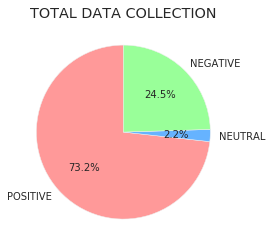

In [ ]:
values = [positive_category,neutral_category,negative_category]
activities = ['POSITIVE','NEUTRAL','NEGATIVE']
colors = ['#ff9999','#66b3ff','#99ff99']
plt.pie(values, labels=activities, startangle=90, autopct='%.1f%%',colors=colors)
plt.title('TOTAL DATA COLLECTION')

plt.show()

In [ ]:
test_comments[test_comments['rating']=="1.0"].head(5)

,text,rating,recommend,sentiment,length,target_rec
3,"After using it for 2-3 months, the headphone is not working!... Waste of money!... Used it decently but still it stopped working!.... Don't spent ur money buying this!. Not working after 2-3 months!",1.0,False,-0.4314,37,0
13,"Surprised to see 'JBL' and 'Amazon' selling defective products, left side was not working, waiting for the replacement and will update the comment accordingly.I expect a basic QC check before the delivery and surprising part is there was no refund option, this product was 'Amazon's choice' and still it came defective, looks like all the rejects are getting dumped without a process in place.. Defective Product, left side not working!",1.0,False,-0.8908,73,0
15,"Material quality - worst I have seen.Sound quality - its average.Durability - when I received the product it looks so frazile that i was even afraid to even test it.Suggestion - its almost beggar beliefs that JBL even manufacture such product and when not on sale they are selling it at 800 rupees. Honest opinion, you can spend same amount of money in amazon and buy something with better built quality. I'm replacing ing this item with boat or leaf headphones.. So cheap that looks Almost fake",1.0,False,-0.0018,87,0
18,"This is a really very cheap and worst product by Jbl.Sound quality is really annoying and poor. I must say roadside earphones are much better than this.I got stuck after buying it as Amazon's policy is just replacement and not refunding so can't help now, but for new buyer I'll say go for some other branding like sony or boat where you will get quality product for sure.Ear fit is good but need good sound also with it.. Worst JBl product and poor sound quality.I buyed disappointment for Rs800.",1.0,False,-0.8236,97,0
22,It worked fine for around 1.5 months and thereafter sound from one of the speaker became almost nil.Two more negatives1) Does not contain volume control2) Identifier to distinguish between left and right speaker is not easy to find and read on day to day basis. It worked fine for around 1,1.0,False,0.0500,53,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
# need to reset index of the comments column to match with textfeatures
new_sentiment = test_comments.sentiment.reset_index()['sentiment']
new_length = test_comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,test_comments.target_rec,test_size=0.2)

rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)


y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[0:10]

[(0.09207514335459471, 'sentiment'),
 (0.022599767492100072, 'micedit'),
 (0.019750713966712758, 'ultra'),
 (0.018723177849118037, 'mudul'),
 (0.017948158030898942, 'earphoneno'),
 (0.015418612896336923, 'weeksand'),
 (0.014202670259604366, 'wastagebecaus'),
 (0.013990247203084463, 'length'),
 (0.012788155713085782, 'harmankardon'),
 (0.012459002055103773, 'jean')]

In [ ]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('Precision: {} / Recall :{} / Accuracy {} '.format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==y_test).sum()/len(y_test),3)))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Precision: 0.899 / Recall :0.973 / Accuracy 0.895 
F1 score: 0.934252


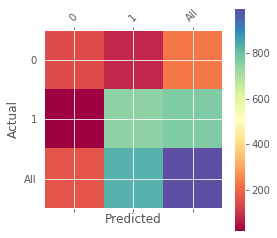

In [ ]:
import pandas as pand
df_confusion = pand.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.get_cmap("Spectral")):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       231
           1       0.90      0.97      0.93       767

    accuracy                           0.89       998
   macro avg       0.89      0.80      0.84       998
weighted avg       0.89      0.89      0.89       998



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_1=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Pred_neg','Pred_pos'],index=['neg','pos'])
confusion_1

,Pred_neg,Pred_pos
neg,147,84
pos,21,746


In [ ]:
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
X= test_comments['text']
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
X = bow_transformer.transform(X)

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(x_features,test_comments.target_rec, test_size=0.3, random_state=101)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

ValueError: ignored

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train) 
predsvm=clf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(x_test)
clf.score(x_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y) 
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(x_train,y_train)

Using TensorFlow backend.


{'good': 1, 'quality': 2, 'sound': 3, 'product': 4, 'bass': 5, 'jbl': 6, 'earphones': 7, 'price': 8, 'one': 9, 'best': 10, 'earphone': 11, 'working': 12, 'months': 13, 'buy': 14, 'ear': 15, 'great': 16, 'nice': 17, 'better': 18, 'money': 19, 'mic': 20, 'using': 21, 'awesome': 22, 'like': 23, 'also': 24, 'use': 25, 'range': 26, 'music': 27, 'worth': 28, 'wire': 29, 'headphones': 30, 'noise': 31, 'time': 32, 'bought': 33, 'really': 34, 'headphone': 35, 'amazon': 36, 'used': 37, 'got': 38, 'year': 39, 'much': 40, 'stopped': 41, 'side': 42, 'amazing': 43, 'bad': 44, 'even': 45, 'overall': 46, 'value': 47, 'clear': 48, 'poor': 49, 'phone': 50, 'well': 51, 'excellent': 52, 'get': 53, 'build': 54, 'cancellation': 55, 'month': 56, 'warranty': 57, 'material': 58, 'low': 59, 'high': 60, 'average': 61, 'worst': 62, 'perfect': 63, 'service': 64, 'brand': 65, 'last': 66, 'long': 67, 'would': 68, 'durability': 69, 'durable': 70, 'ears': 71, 'volume': 72, 'experience': 73, 'treble': 74, 'clarity': 75

NameError: ignored

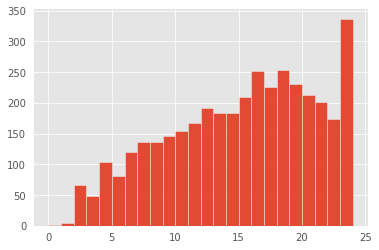

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())
print(sequence_dict)
reviews_encoded = []
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review])

lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])
np.random.seed(1024)
random_posits = np.arange(len(X))
np.random.shuffle(random_posits)
X = X[random_posits]
Y = Y[random_posits]
train_cap = int(0.85 * len(X))
dev_cap = int(0.93 * len(X))

X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding


model1 = Sequential();
model1.add(Embedding(len(word_dict)+1, max_cap, input_length=max_cap));
#adding a LSTM layer of dim 1--
model1.add(LSTM(150, return_sequences=True));
model1.add(LSTM(150, return_sequences=False));
#adding a dense layer with activation function of relu
model1.add(Dense(100, activation='relu', init='uniform'));#best 50,relu
#adding the final output activation with activation function of softmax
model1.add(Dense(2, activation='sigmoid', init='uniform'));
print(model1.summary());
optimizer = Adam(lr=0.0001, decay=0.0001);

model1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model and run it for 5 epochs
model1.fit(X_train, Y_train, batch_size=16, epochs=5, validation_data=(X_dev, Y_dev))




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 8, 8)              57352     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 150)            95400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 348,654
Trainable params: 348,654
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="sigmoid", kernel_initializer="uniform")`


NameError: ignored

In [ ]:
score = model1.evaluate(X_test1, Y_test1)
print("Test accuracy: %0.4f%%" % (score[1]*100))
